December 28th 2024

## Objective

 * Employing a classification problem to accurately predict whether or not apartments allow pets. 

#### Dataset Description

- **id**: Unique identifier of apartment
- **category**: Category of classified
- **title**: Title text of apartment
- **body**: Body text of apartment
- **amenities**: Features like AC, basketball, cable, gym, internet access, pool, refrigerator, etc.
- **bathrooms**: Number of bathrooms
- **bedrooms**: Number of bedrooms
- **currency**: Price in current currency
- **fee**: Fee associated with renting
- **has_photo**: Indicates if a photo of the apartment is available (`True`/`False`)
- **pets_allowed**: Specifies what pets are allowed (dogs, cats, etc.)
- **price**: Rental price of apartment
- **price_display**: Price converted into display format for the reader
- **price_type**: Indicates if the price is in USD
- **square_feet**: Size of the apartment in square feet
- **address**: Address where the apartment is located
- **cityname**: City where the apartment is located
- **state**: State where the apartment is located
- **latitude**: Geographic latitude of the apartment's location
- **longitude**: Geographic longitude of the apartment's location
- **source**: Origin of the classified advertisement
- **time**: When the classified was created


## Loading the libraries and the dataset

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 2000)
import warnings
warnings.simplefilter('ignore')


from sklearn.model_selection import train_test_split, GridSearchCV, StratifiedKFold, cross_val_score
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import GradientBoostingClassifier, RandomForestClassifier
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report

In [29]:
df = pd.read_csv('apartments.csv')

## Exploring and Understanding the Data

In [30]:
df.head()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
0,5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790.00,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
1,5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425.00,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
2,5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390.00",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
3,5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925.00,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
4,5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880.00,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [31]:
df.tail()

,id,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
9995,5630240092,housing/rent/apartment,Five BR 5407 Abbott Place - Abbott,This unit is located at 5407 Abbott Place - Ab...,NaN,4.0,5.0,USD,No,Thumbnail,None,6000,"$6,000.00",Monthly,6300,5407 Abbott Place Abbott,Edina,MN,44.9000,-93.3233,RentLingo,1575112975
9996,5668640983,housing/rent/apartment,Six BR 256 Las Entradas,"This unit is located at 256 Las Entradas, Mont...",NaN,8.0,6.0,USD,No,Thumbnail,None,25000,"$25,000.00",Monthly,8716,256 Las Entradas,Montecito,CA,34.4331,-119.6331,RentLingo,1577360419
9997,5668643292,housing/rent/apartment,Six BR 9908 Bentcross Drive,"This unit is located at 9908 Bentcross Drive, ...",NaN,8.5,6.0,USD,No,Thumbnail,None,11000,"$11,000.00",Monthly,11318,9908 Bentcross Dr,Potomac,MD,39.0287,-77.2409,RentLingo,1577360560
9998,5668662559,housing/rent/apartment,One BR in New York NY 10069,"Monthly Rent$4,605 -to $4,790AmenitiesThe Aldy...","Basketball,Cable or Satellite,Doorman,Hot Tub,...",NaN,1.0,USD,No,Thumbnail,NaN,4790,"$4,790.00",Monthly,40000,NaN,New York,NY,40.7716,-73.9876,Listanza,1577362186
9999,5509132540,housing/rent/apartment,Beautiful Lawrenceville Apartment for rent,"Square footage: 880 sq. feet, unit number: 150...","Gym,Patio/Deck",1.0,1.0,USD,No,No,NaN,1009,"$1,009.00",Monthly,880,NaN,Lawrenceville,GA,34.0072,-84.0034,RentDigs.com,1577362141


In [32]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   id             10000 non-null  int64  
 1   category       10000 non-null  object 
 2   title          10000 non-null  object 
 3   body           10000 non-null  object 
 4   amenities      6451 non-null   object 
 5   bathrooms      9966 non-null   float64
 6   bedrooms       9993 non-null   float64
 7   currency       10000 non-null  object 
 8   fee            10000 non-null  object 
 9   has_photo      10000 non-null  object 
 10  pets_allowed   8252 non-null   object 
 11  price          10000 non-null  int64  
 12  price_display  10000 non-null  object 
 13  price_type     10000 non-null  object 
 14  square_feet    10000 non-null  int64  
 15  address        6673 non-null   object 
 16  cityname       9923 non-null   object 
 17  state          9923 non-null   object 
 18  latitud

In [33]:
df.set_index('id',inplace=True)

In [34]:
df.head()

,category,title,body,amenities,bathrooms,bedrooms,currency,fee,has_photo,pets_allowed,price,price_display,price_type,square_feet,address,cityname,state,latitude,longitude,source,time
id,,,,,,,,,,,,,,,,,,,,,
5668626895,housing/rent/apartment,"Studio apartment 2nd St NE, Uhland Terrace NE,...","This unit is located at second St NE, Uhland T...",NaN,NaN,0.0,USD,No,Thumbnail,None,790,$790.00,Monthly,101,NaN,Washington,DC,38.9057,-76.9861,RentLingo,1577359415
5664597177,housing/rent/apartment,Studio apartment 814 Schutte Road,"This unit is located at 814 Schutte Road, Evan...",NaN,NaN,1.0,USD,No,Thumbnail,None,425,$425.00,Monthly,106,814 Schutte Rd,Evansville,IN,37.9680,-87.6621,RentLingo,1577017063
5668626833,housing/rent/apartment,"Studio apartment N Scott St, 14th St N, Arling...","This unit is located at N Scott St, 14th St N,...",NaN,1.0,0.0,USD,No,Thumbnail,None,1390,"$1,390.00",Monthly,107,NaN,Arlington,VA,38.8910,-77.0816,RentLingo,1577359410
5659918074,housing/rent/apartment,Studio apartment 1717 12th Ave,"This unit is located at 1717 12th Ave, Seattle...",NaN,1.0,0.0,USD,No,Thumbnail,None,925,$925.00,Monthly,116,1717 12th Avenue,Seattle,WA,47.6160,-122.3275,RentLingo,1576667743
5668626759,housing/rent/apartment,"Studio apartment Washington Blvd, N Cleveland ...","This unit is located at Washington Blvd, N Cle...",NaN,NaN,0.0,USD,No,Thumbnail,None,880,$880.00,Monthly,125,NaN,Arlington,VA,38.8738,-77.1055,RentLingo,1577359401


In [35]:
def visualize_numerical_variables(df):
  
    # Identify numerical columns by dtype
    numerical_columns = df.select_dtypes(include=['float64', 'int64']).columns
    
    # Setting the aesthetic style of the plots
    sns.set_style("whitegrid")
    
    # Iterate through the numerical columns and generate plots
    for col in numerical_columns:
        # Histogram
        plt.figure(figsize=(12, 5))
        plt.subplot(1, 2, 1)  # 1 row, 2 columns, 1st plot
        sns.histplot(df[col], bins=30, kde=True, color='skyblue')
        plt.title(f'Histogram of {col}')
        plt.xlabel(col)
        plt.ylabel('Frequency')
        
        # Boxplot
        plt.subplot(1, 2, 2)  # 1 row, 2 columns, 2nd plot
        sns.boxplot(x=df[col], color='lightgreen')
        plt.title(f'Boxplot of {col}')
        plt.xlabel(col)
        
        plt.tight_layout()
        plt.show()

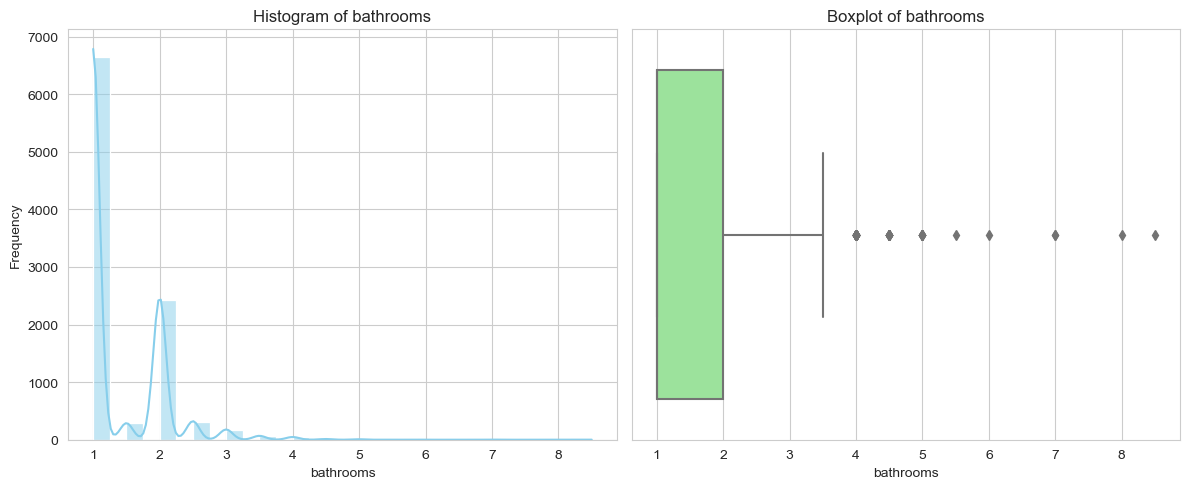

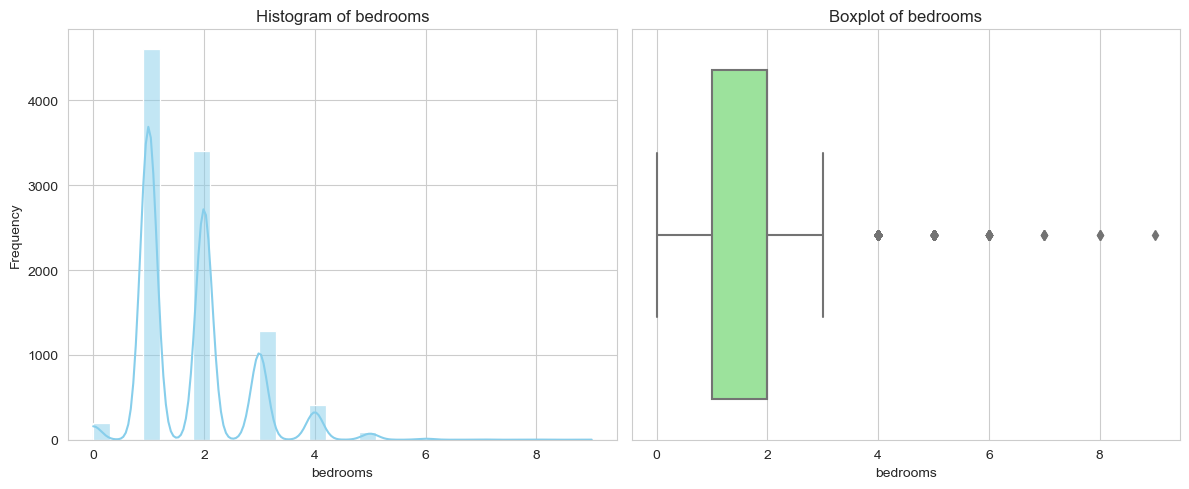

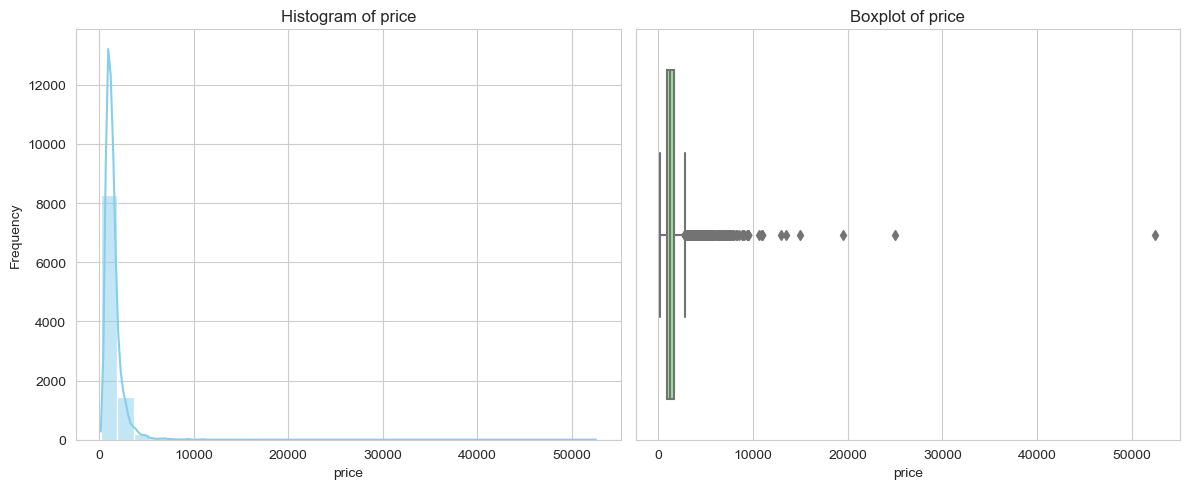

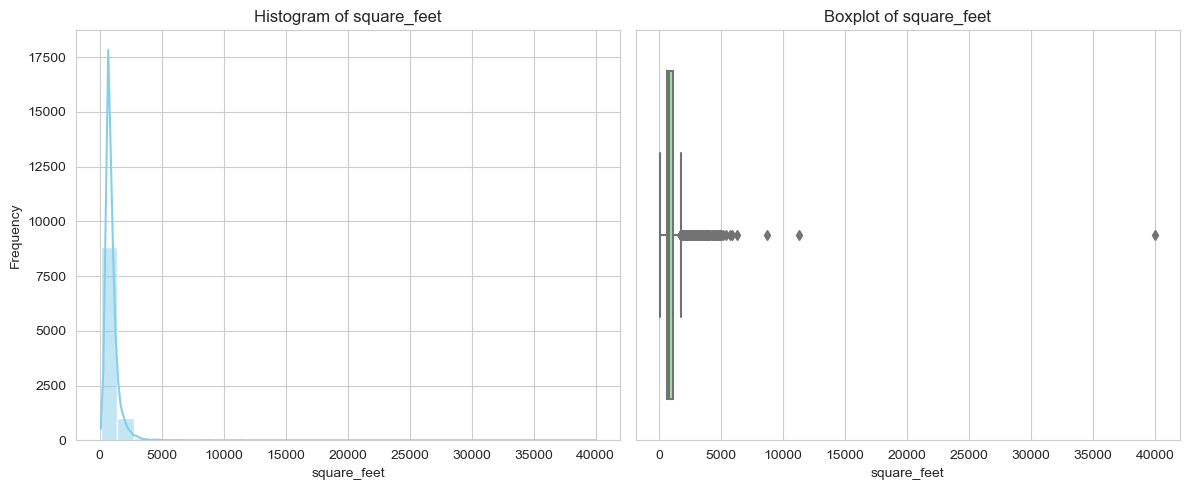

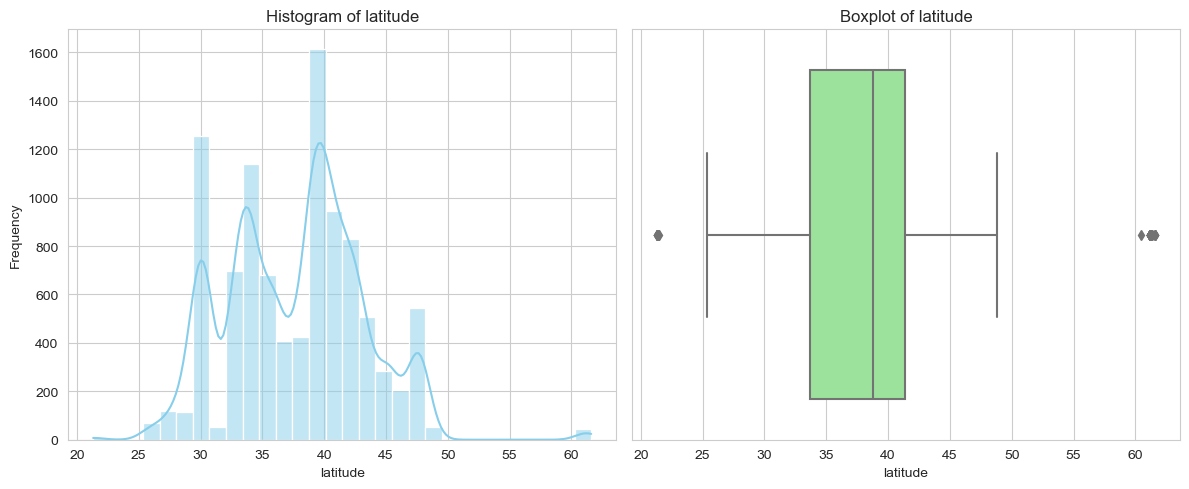

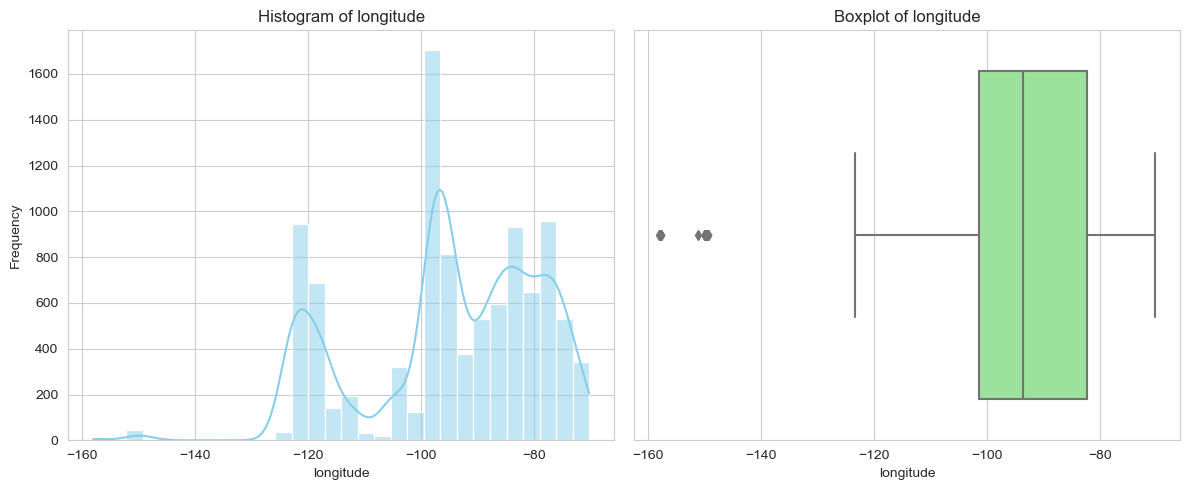

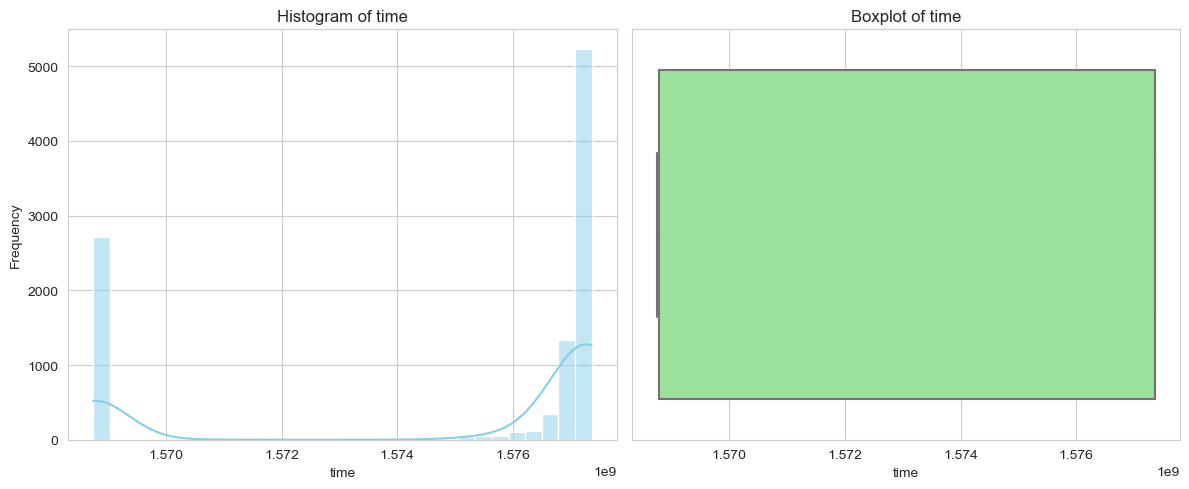

In [36]:
visualize_numerical_variables(df)

In [37]:
def visualize_categorical_variables(df, max_categories=20):
  
    # Identify categorical columns
    categorical_columns = df.select_dtypes(include=['object', 'category', 'bool']).columns
    
    # Setting the aesthetic style of the plots
    sns.set_style("whitegrid")
    
    # Iterate through the categorical columns and generate count plots
    for col in categorical_columns:
        # Skip columns with too many categories to avoid cluttered plots
        if df[col].nunique() > max_categories:
            print(f'Skipping {col} as it has more than {max_categories} unique categories.')
            continue
        
        plt.figure(figsize=(10, 6))
        sns.countplot(y=col, data=df, order = df[col].value_counts().index)
        plt.title(f'Count Plot of {col}')
        plt.xlabel('Count')
        plt.ylabel(col)
        plt.show()


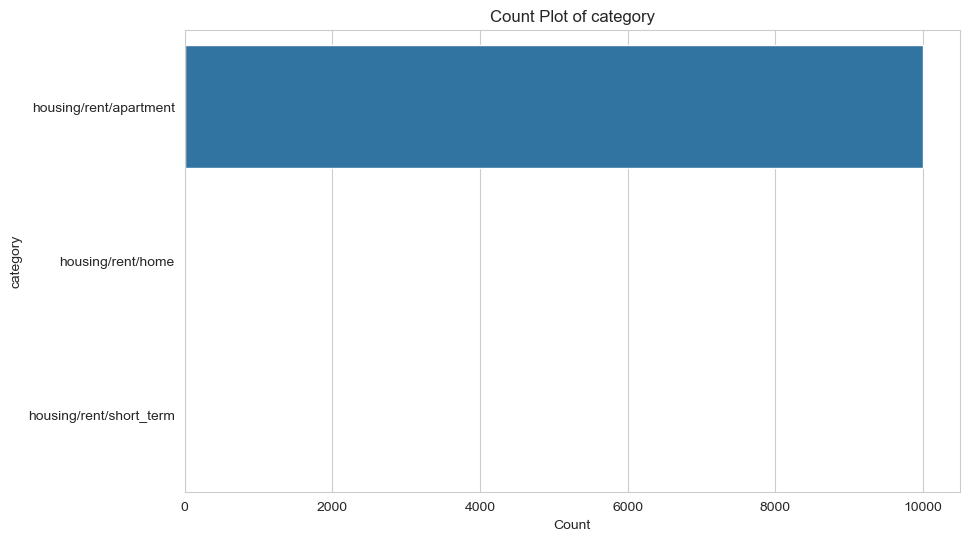

Skipping title as it has more than 20 unique categories.
Skipping body as it has more than 20 unique categories.
Skipping amenities as it has more than 20 unique categories.


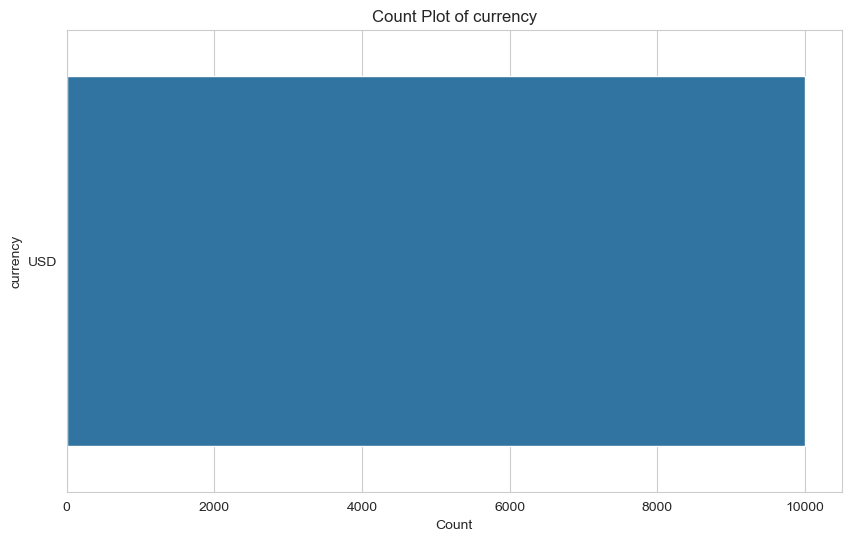

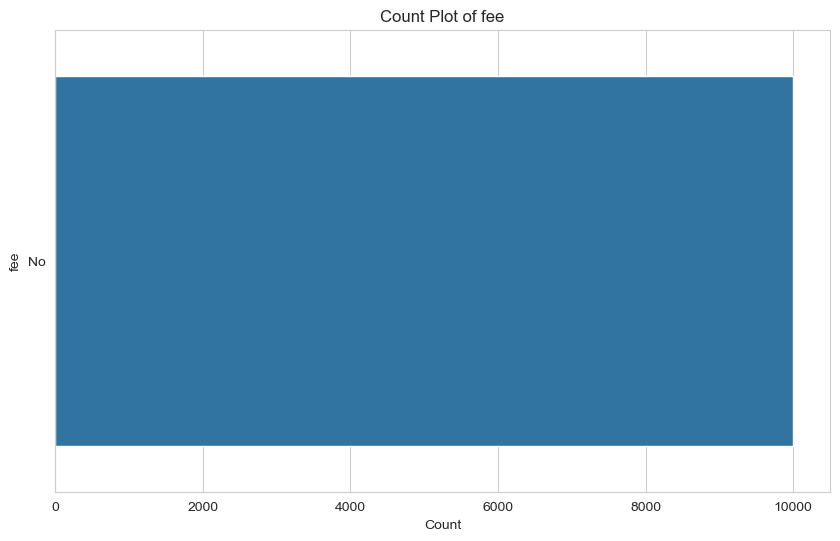

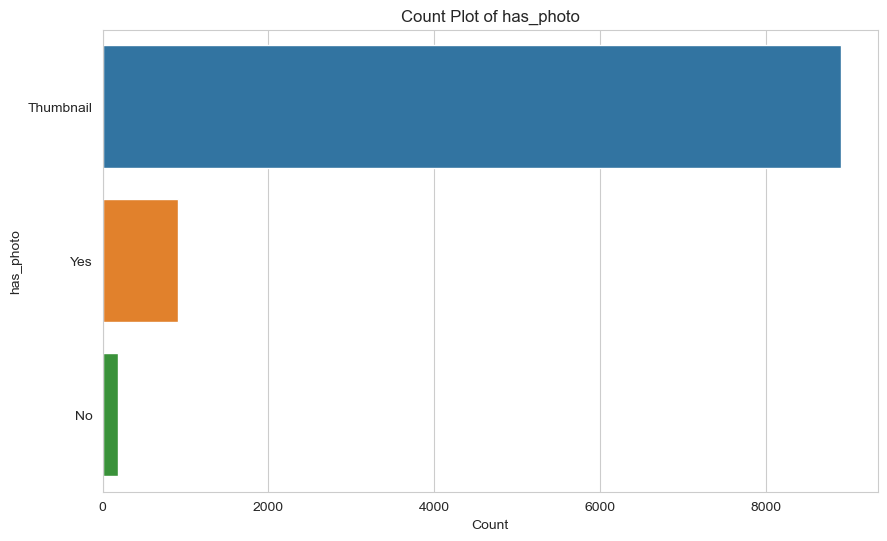

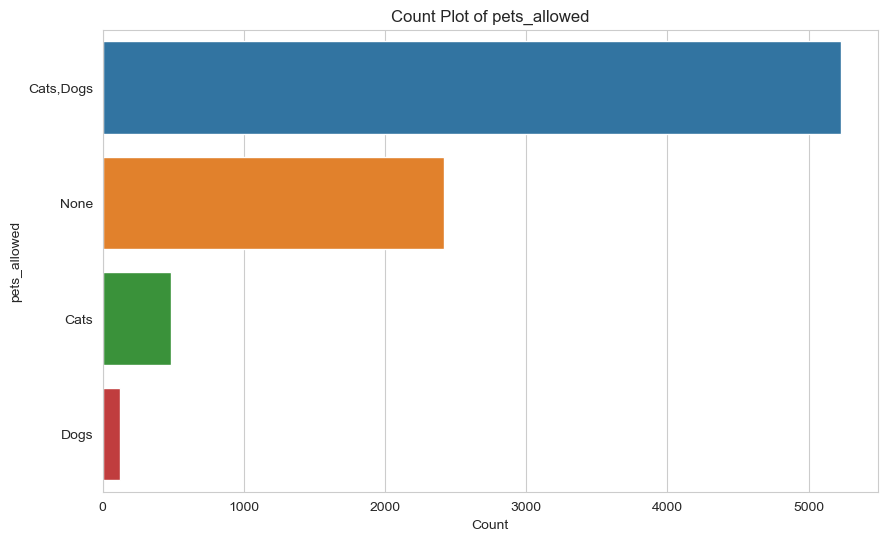

Skipping price_display as it has more than 20 unique categories.


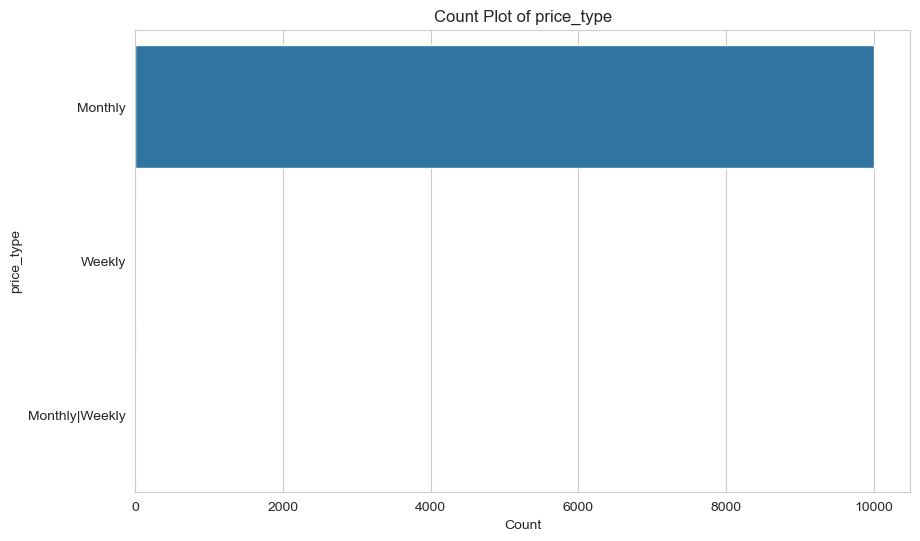

Skipping address as it has more than 20 unique categories.
Skipping cityname as it has more than 20 unique categories.
Skipping state as it has more than 20 unique categories.


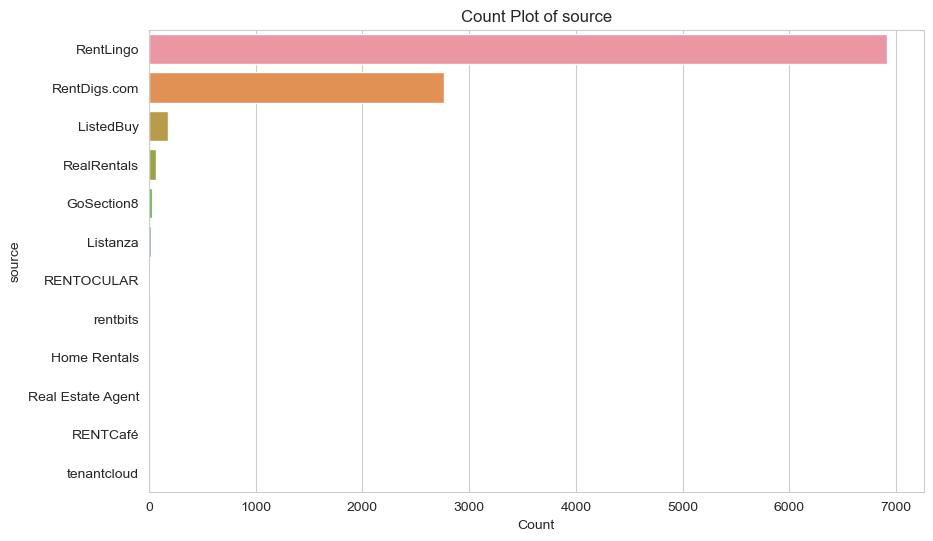

In [38]:
visualize_categorical_variables(df)

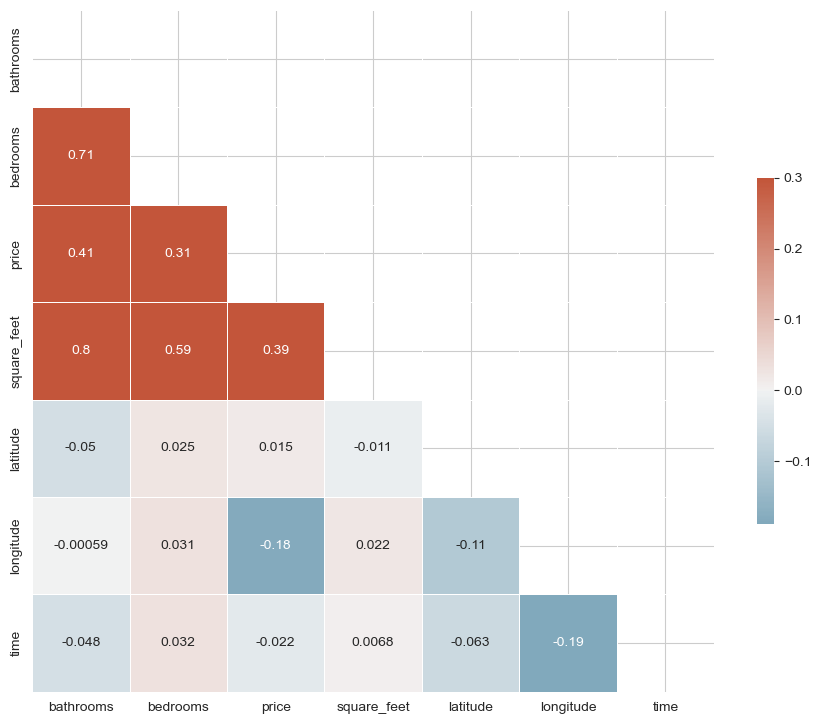

In [39]:

# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(numeric_only=True), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

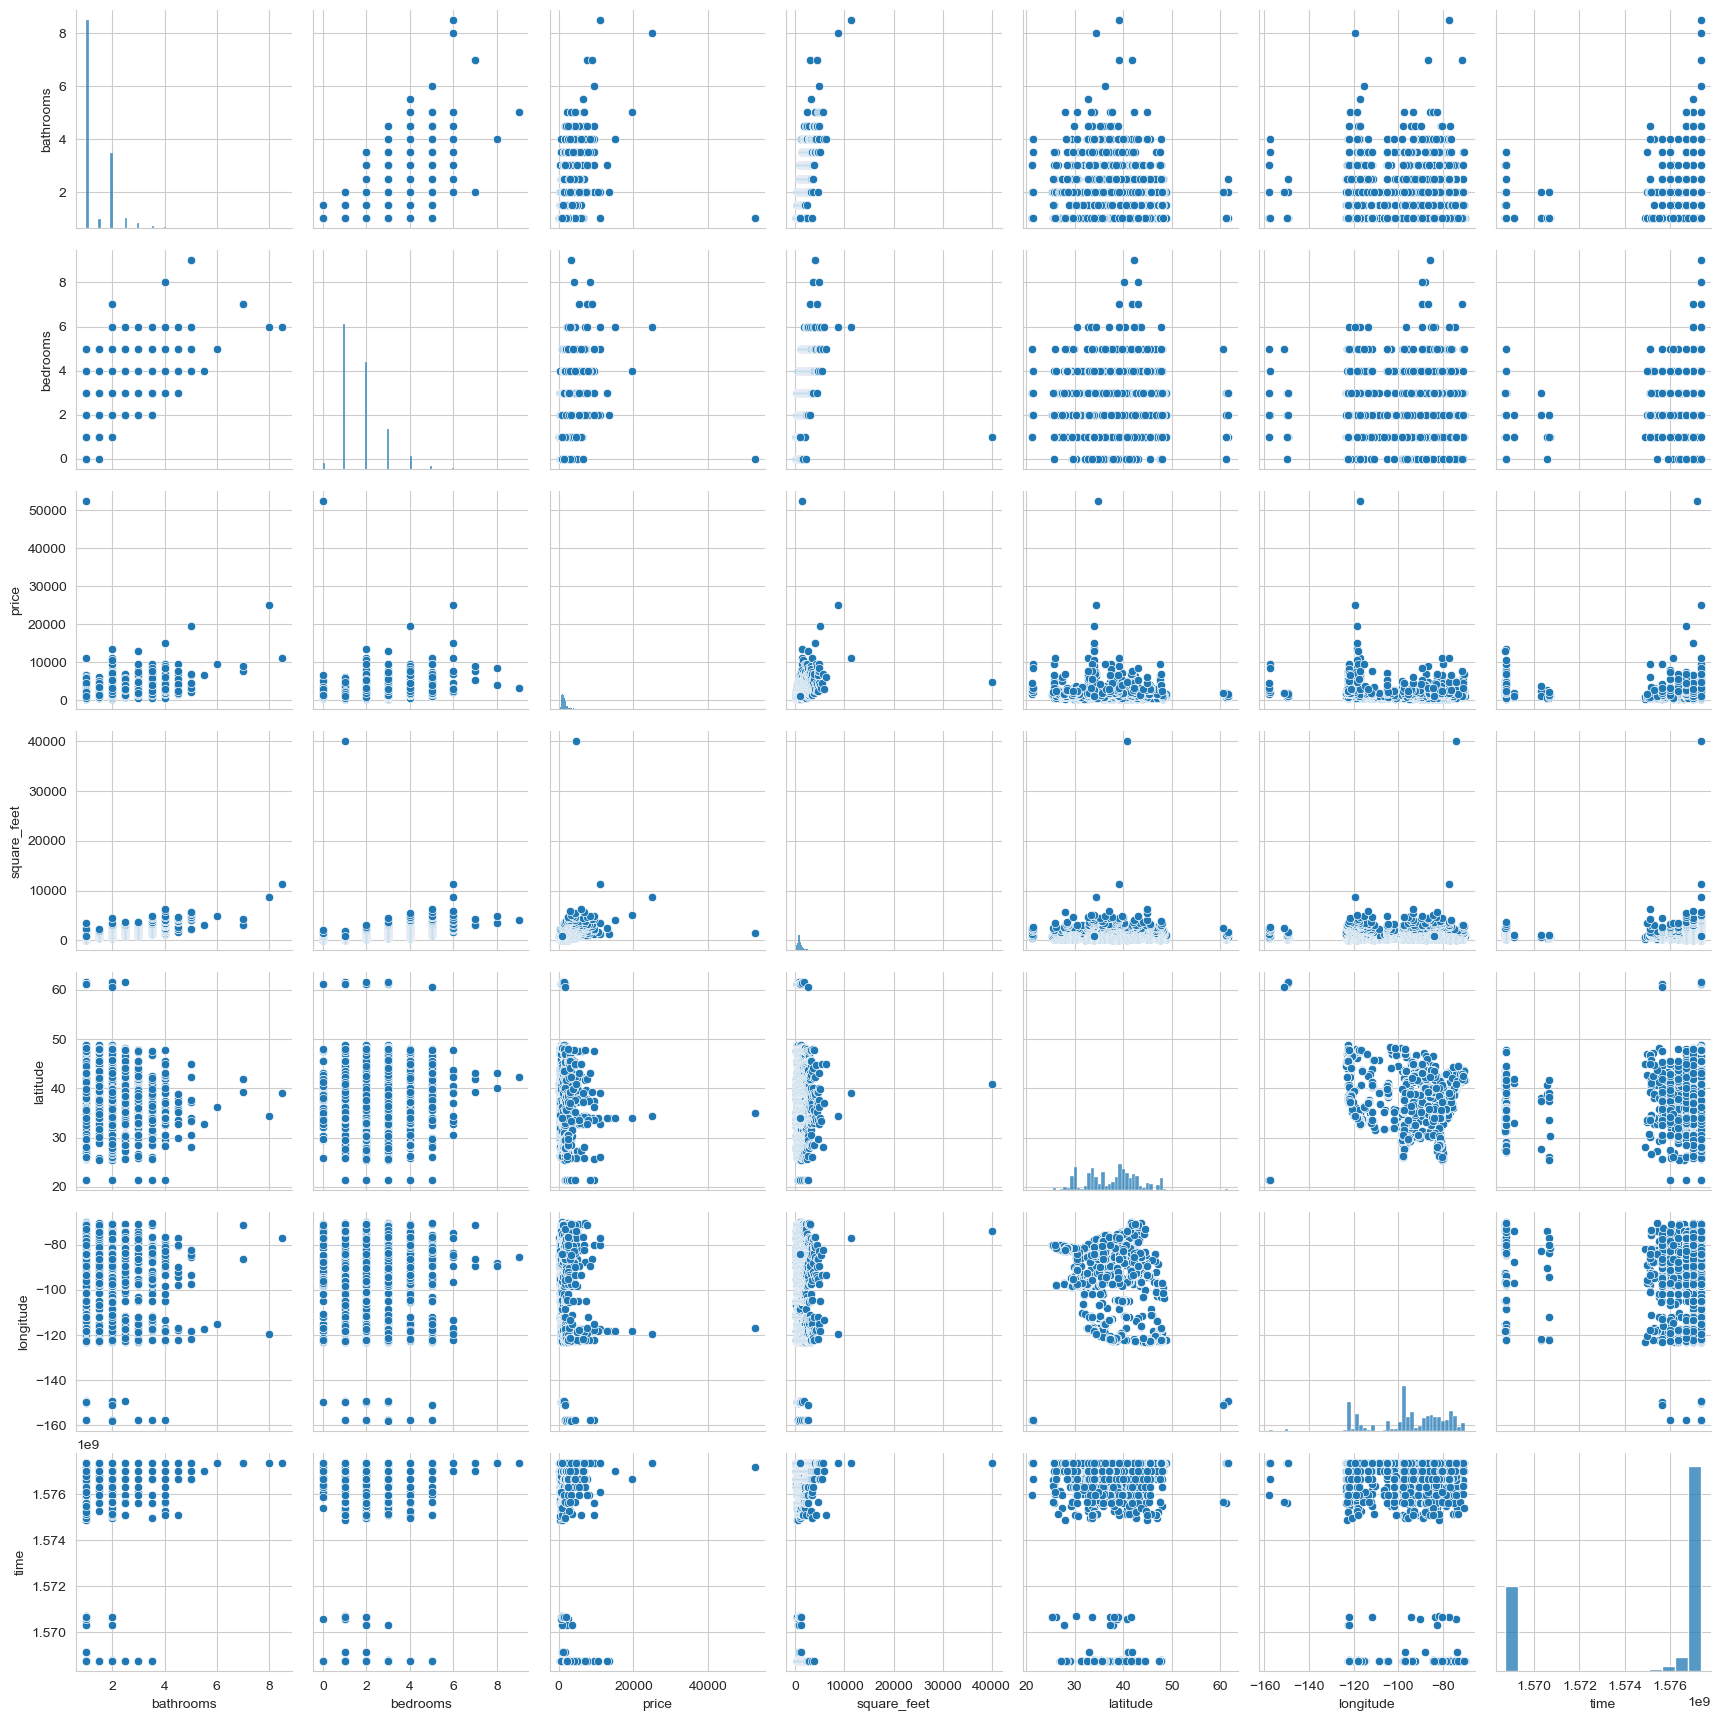

In [40]:
sns.pairplot(df);

## Preprocessing the Data

In [41]:
# Assuming 'df' is your DataFrame
# Select columns of dtype 'object' or 'category' which are typically non-numerical
categorical_columns = df.select_dtypes(include=['object', 'category']).columns

# Iterate through the list of categorical columns
for col in categorical_columns:
    print(f"Value counts for {col}:")
    print(df[col].value_counts(dropna=False))  # dropna=False includes NaN counts if any
    print("\n" + "-"*50 + "\n")  # Print a separator line

Value counts for category:
housing/rent/apartment     9996
housing/rent/home             2
housing/rent/short_term       2
Name: category, dtype: int64

--------------------------------------------------

Value counts for title:
Apartment in great location                           40
Super Cute! Apartment for Rent!                       32
Apartment in prime location                           31
This Apartment is a must see!                         27
Apartment in quiet area, spacious with big kitchen    26
                                                      ..
One BR 218 South Walnut                                1
One BR 5505 Bonner Ave.,                               1
One BR 21200 Kittridge St                              1
One BR 807 WEST LYNN                                   1
Beautiful Lawrenceville Apartment for rent             1
Name: title, Length: 9350, dtype: int64

--------------------------------------------------

Value counts for body:
When searching for a pet-fri

In [42]:
# List of columns to be dropped
columns_to_drop = ['latitude', 'longitude', 'time', 'category', 'title', 
                   'body', 'amenities', 'currency', 'fee', 'price_display', 
                   'price_type', 'address', 'cityname']

# Dropping the specified columns from the DataFrame
df = df.drop(columns=columns_to_drop, axis=1)

# Display the first few rows of the updated DataFrame to confirm the changes
df.head()

,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,state,source
id,,,,,,,,
5668626895,NaN,0.0,Thumbnail,None,790,101,DC,RentLingo
5664597177,NaN,1.0,Thumbnail,None,425,106,IN,RentLingo
5668626833,1.0,0.0,Thumbnail,None,1390,107,VA,RentLingo
5659918074,1.0,0.0,Thumbnail,None,925,116,WA,RentLingo
5668626759,NaN,0.0,Thumbnail,None,880,125,VA,RentLingo


In [43]:
df.isna().sum()

bathrooms         34
bedrooms           7
has_photo          0
pets_allowed    1748
price              0
square_feet        0
state             77
source             0
dtype: int64

In [44]:
df.shape

(10000, 8)

In [45]:
df['has_photo'] = df['has_photo'].map({'Thumbnail': True, 'Yes': True, 'No': False}).fillna(False)

# Assuming NaN means pets are not allowed
df['pets_allowed'] = df['pets_allowed'].map({'Cats,Dogs': True, 'Cats': True, 'Dogs': True, 'None': False}).fillna(False)

In [46]:
print(df['has_photo'].value_counts(dropna=False))
print(df['pets_allowed'].value_counts(dropna=False))

True     9816
False     184
Name: has_photo, dtype: int64
True     5837
False    4163
Name: pets_allowed, dtype: int64


In [47]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10000 entries, 5668626895 to 5509132540
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   bathrooms     9966 non-null   float64
 1   bedrooms      9993 non-null   float64
 2   has_photo     10000 non-null  bool   
 3   pets_allowed  10000 non-null  bool   
 4   price         10000 non-null  int64  
 5   square_feet   10000 non-null  int64  
 6   state         9923 non-null   object 
 7   source        10000 non-null  object 
dtypes: bool(2), float64(2), int64(2), object(2)
memory usage: 566.4+ KB


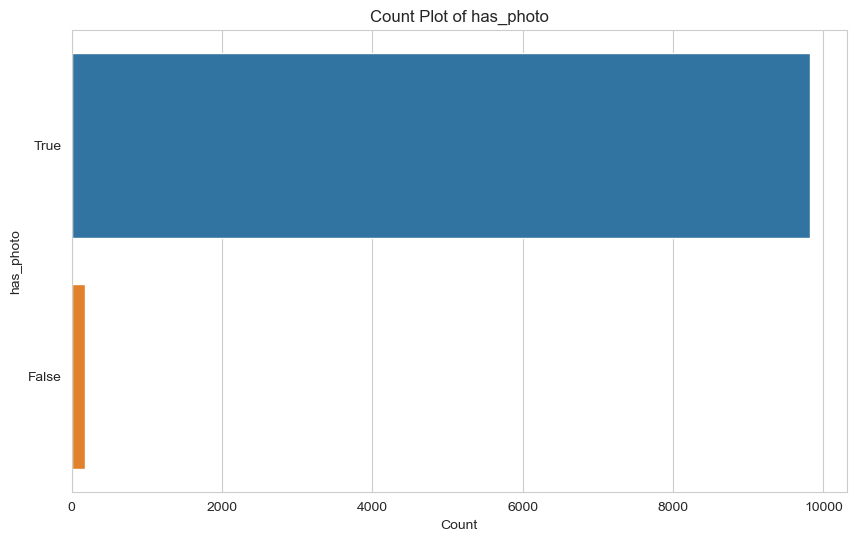

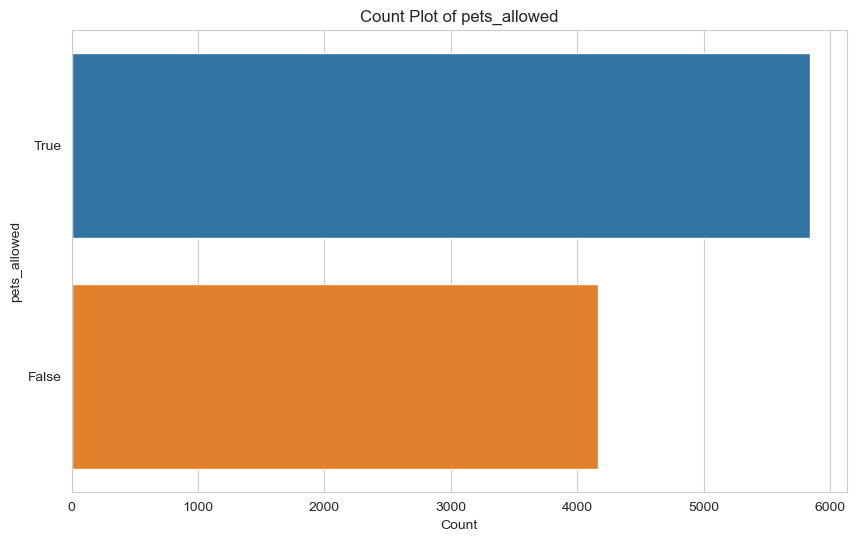

Skipping state as it has more than 20 unique categories.


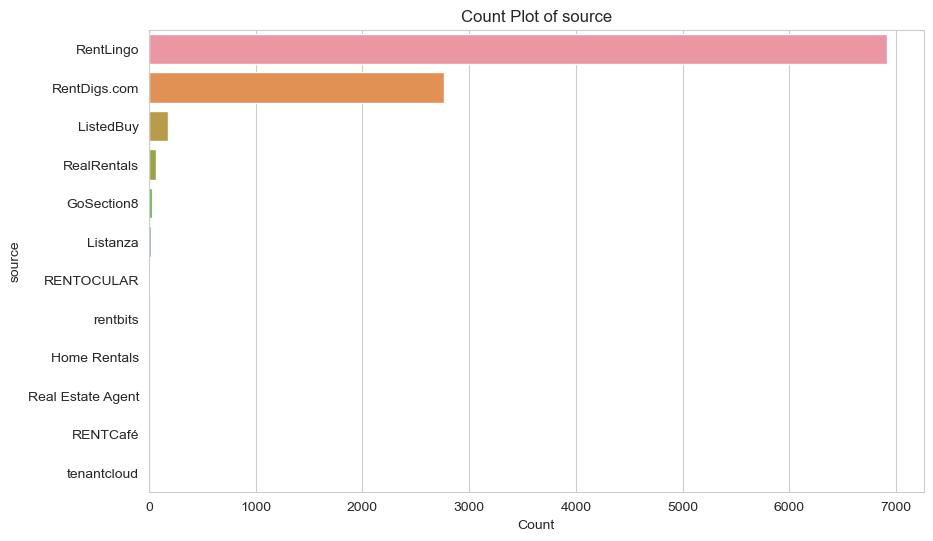

In [48]:
visualize_categorical_variables(df)

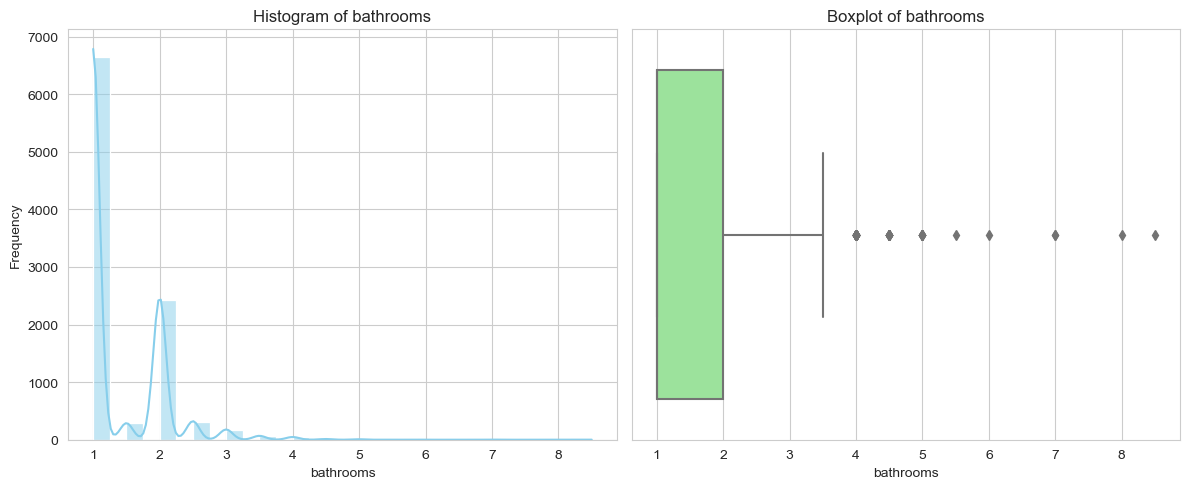

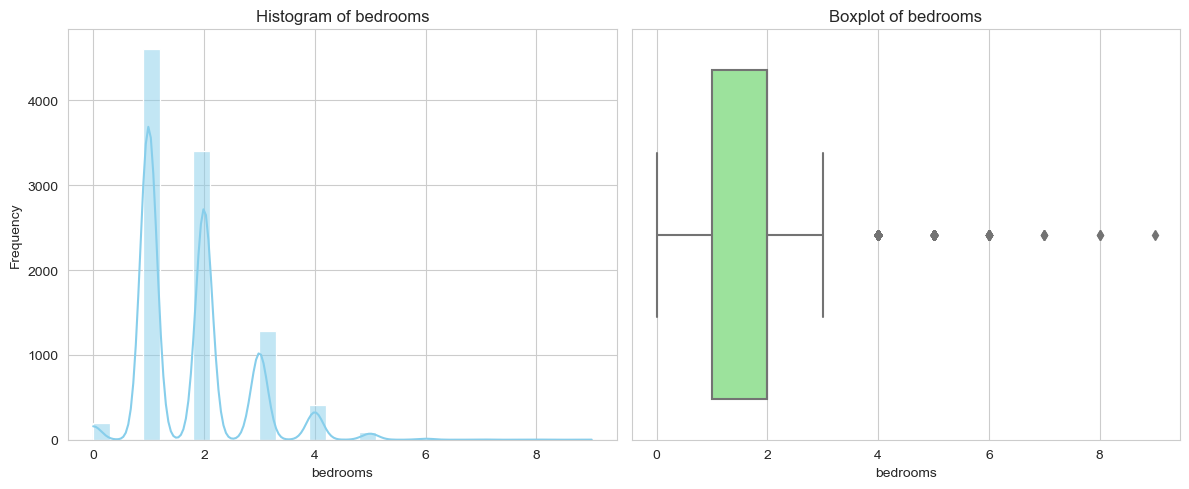

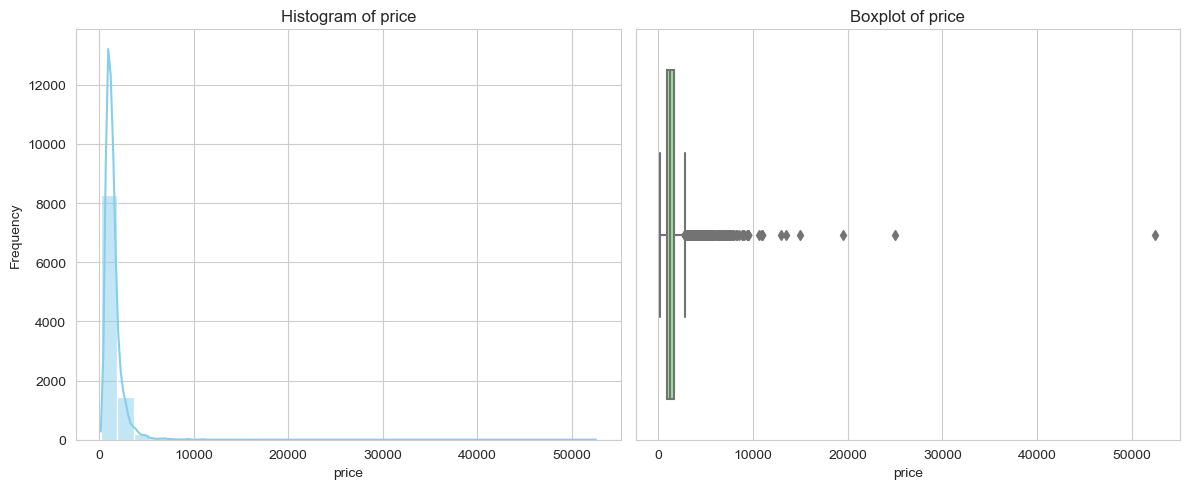

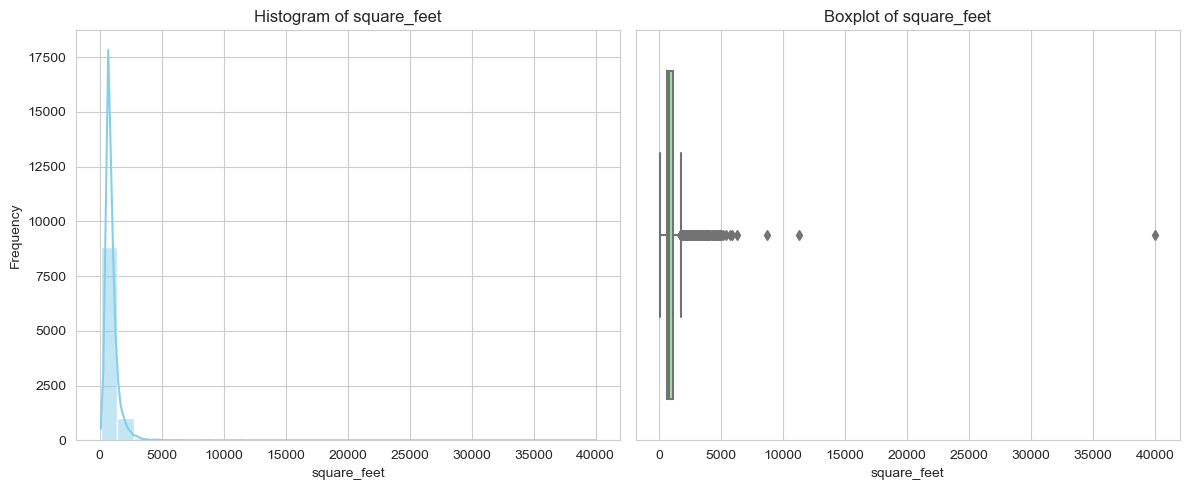

In [49]:
visualize_numerical_variables(df)

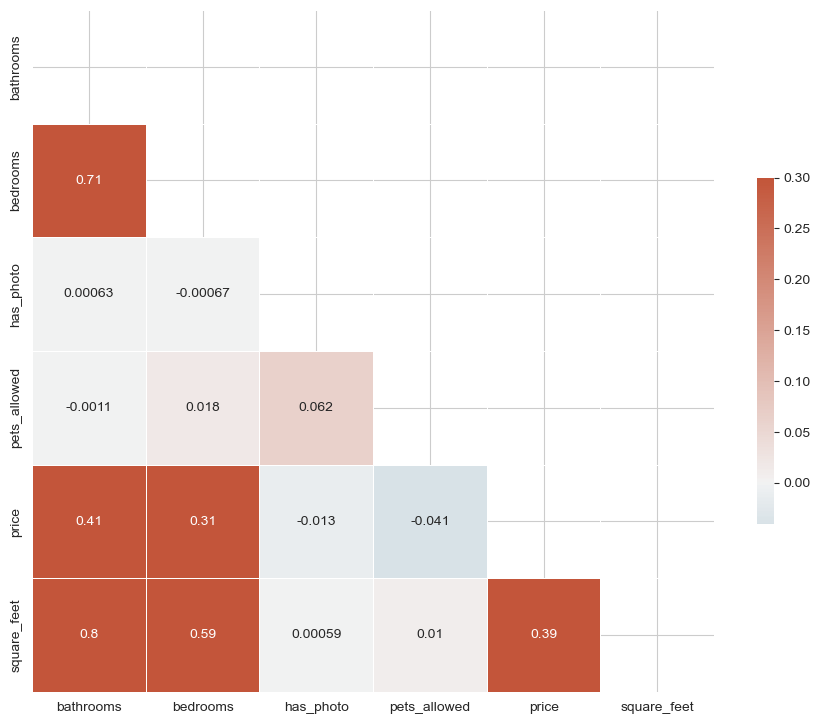

In [50]:
# Create a mask to display only the lower triangle of the matrix
mask = np.triu(np.ones_like(df.corr(numeric_only=True), dtype=bool))

# Set up the matplotlib figure
plt.figure(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(df.corr(numeric_only=True), mask=mask, cmap=cmap, vmax=.3, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5}, annot=True)

plt.show()

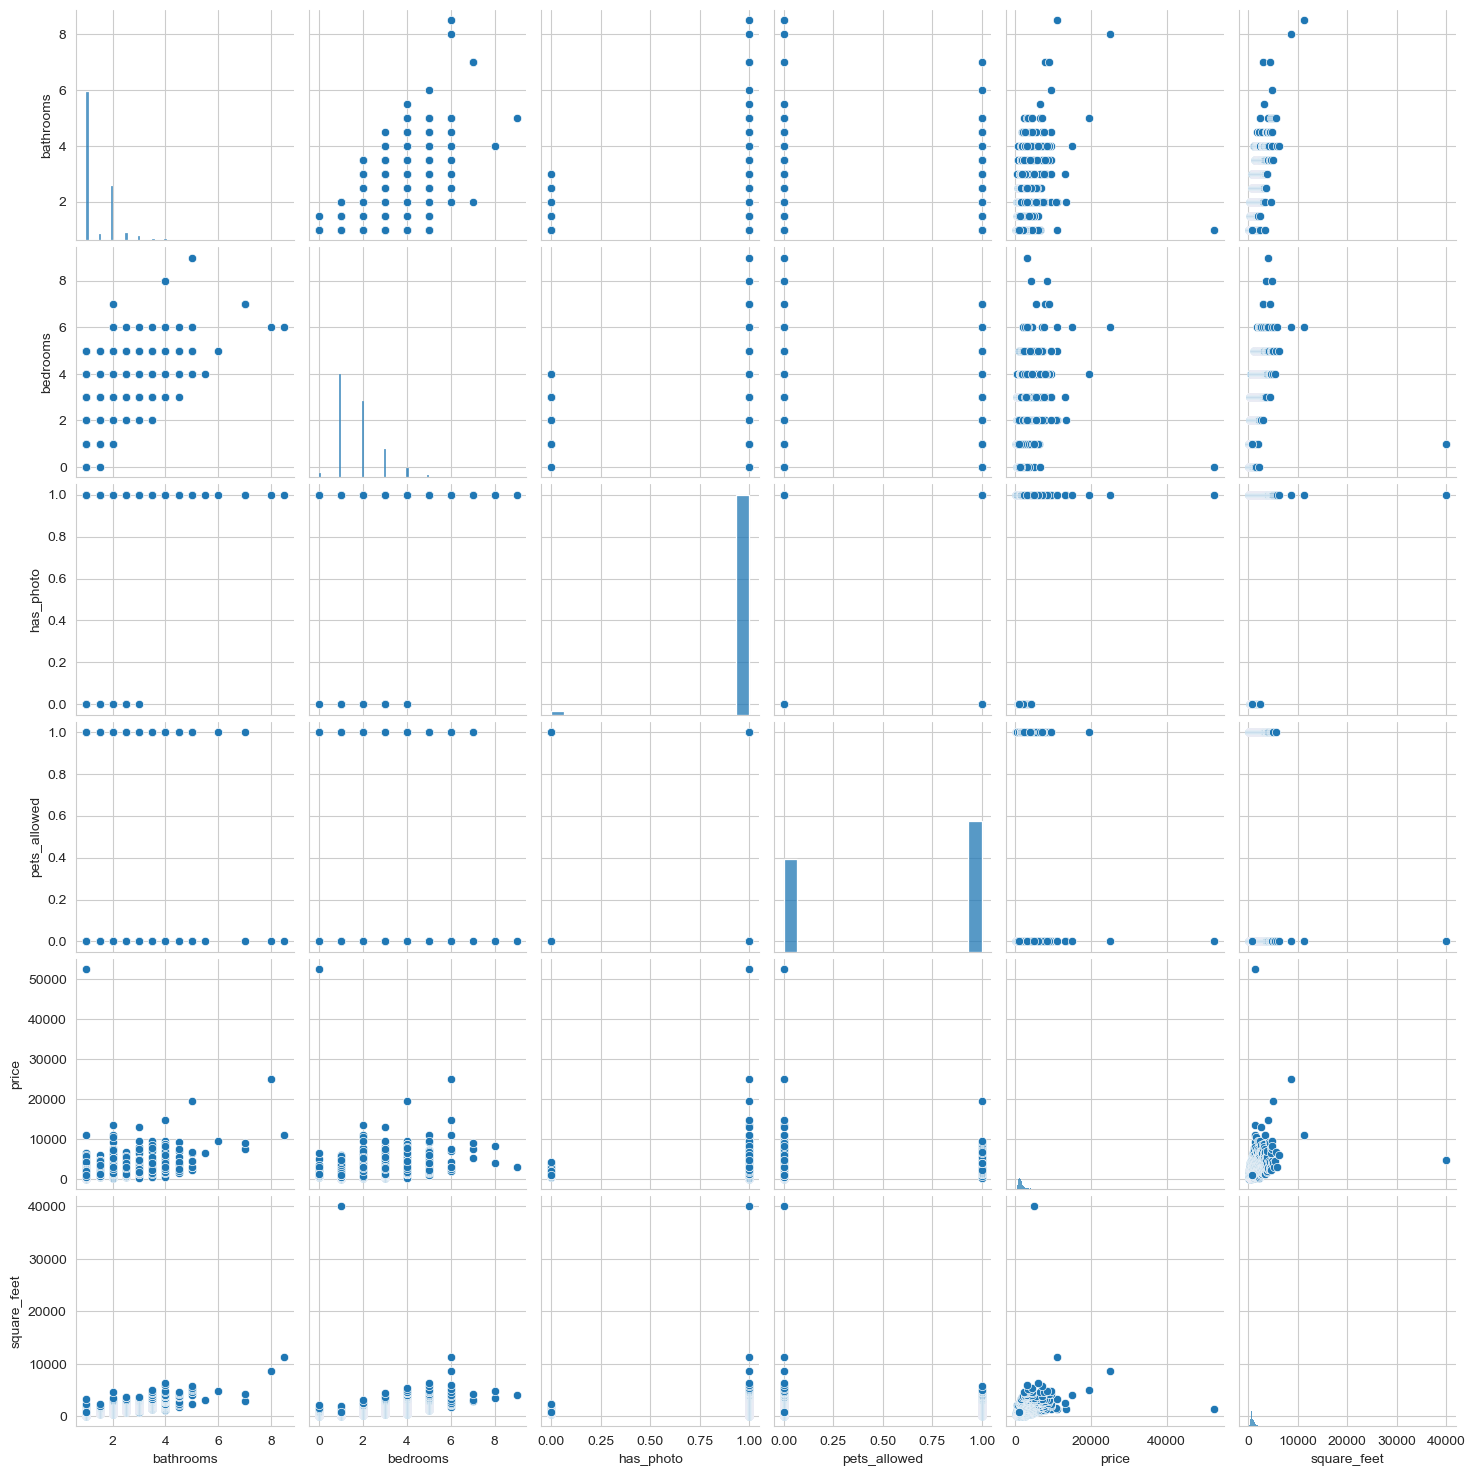

In [51]:
sns.pairplot(df);

In [58]:
df.head()

,bathrooms,bedrooms,has_photo,pets_allowed,price,square_feet,state,source
id,,,,,,,,
5668626895,NaN,0.0,True,False,790,101,DC,RentLingo
5664597177,NaN,1.0,True,False,425,106,IN,RentLingo
5668626833,1.0,0.0,True,False,1390,107,VA,RentLingo
5659918074,1.0,0.0,True,False,925,116,WA,RentLingo
5668626759,NaN,0.0,True,False,880,125,VA,RentLingo


## Splitting the Data

In [60]:
X = df.drop('pets_allowed', axis=1)
y = df['pets_allowed']

X_train, X_test, y_train, y_test = train_test_split(X,y, test_size=0.2, random_state=42)

#### Identify Numerical and Categorical Features

In [63]:
numerical_cols = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_cols = X_train.select_dtypes(include=['object', 'category']).columns

#### Apply Imputation and Standardization to Numerical Features

In [64]:
# Imputation for numerical data
numerical_imputer = SimpleImputer(strategy='median')
X_train_num = numerical_imputer.fit_transform(X_train[numerical_cols])
X_test_num = numerical_imputer.transform(X_test[numerical_cols])

# Standardization for numerical data
scaler = StandardScaler()
X_train_num_scaled = scaler.fit_transform(X_train_num)
X_test_num_scaled = scaler.transform(X_test_num)

#### Apply Imputation and One-Hot Encoding to Categorical Features

In [66]:
# Imputation for categorical data
categorical_imputer = SimpleImputer(strategy='most_frequent')
X_train_cat = categorical_imputer.fit_transform(X_train[categorical_cols])
X_test_cat = categorical_imputer.transform(X_test[categorical_cols])

# One-Hot Encoding for categorical data
encoder = OneHotEncoder(handle_unknown='ignore', sparse_output=False)
X_train_cat_encoded = encoder.fit_transform(X_train_cat)
X_test_cat_encoded = encoder.transform(X_test_cat)

#### Combine Numerical and Categorical Data


In [67]:
# Combining numerical and categorical data for training set
X_train_preprocessed = np.hstack((X_train_num_scaled, X_train_cat_encoded))

# Combining numerical and categorical data for test set
X_test_preprocessed = np.hstack((X_test_num_scaled, X_test_cat_encoded))

#### Optional But Recommended: Convert NumPy Arrays back to Dataframes

In [68]:
# For training data
num_col_names = numerical_cols
cat_col_names = encoder.get_feature_names_out(categorical_cols)
all_col_names = np.append(num_col_names, cat_col_names)
X_train_preprocessed_df = pd.DataFrame(X_train_preprocessed, columns=all_col_names, index=X_train.index)

# For test data
X_test_preprocessed_df = pd.DataFrame(X_test_preprocessed, columns=all_col_names, index=X_test.index)


In [69]:
X_train_preprocessed.shape

(8000, 64)

In [70]:
X_train_preprocessed_df.shape

(8000, 64)

In [71]:
X_train_preprocessed[:5]

array([[ 1.00581741,  1.31646838,  0.00621009,  1.33560735,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  1.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  0.        ,  0.        ,  0.        ,  0.        ,
         0.        ,  1.        ,  0.        ,  0.        ],
       [-0.61712315, -0.78777678, -0.22319949, -0.71221308,  0.

In [72]:
X_train_preprocessed_df.head()

,bathrooms,bedrooms,price,square_feet,state_AK,state_AL,state_AR,state_AZ,state_CA,state_CO,state_CT,state_DC,state_DE,state_FL,state_GA,state_HI,state_IA,state_ID,state_IL,state_IN,state_KS,state_KY,state_LA,state_MA,state_MD,state_MI,state_MN,state_MO,state_MS,state_MT,state_NC,state_ND,state_NE,state_NH,state_NJ,state_NM,state_NV,state_NY,state_OH,state_OK,state_OR,state_PA,state_RI,state_SC,state_SD,state_TN,state_TX,state_UT,state_VA,state_VT,state_WA,state_WI,state_WV,state_WY,source_GoSection8,source_Listanza,source_ListedBuy,source_RENTOCULAR,source_Real Estate Agent,source_RealRentals,source_RentDigs.com,source_RentLingo,source_rentbits,source_tenantcloud
id,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
5664573076,1.005817,1.316468,0.006210,1.335607,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5668635492,-0.617123,-0.787777,-0.223199,-0.712213,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5668632289,-0.617123,-0.787777,0.160655,-0.687812,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0
5509275588,0.194347,0.264346,0.172397,-0.074029,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0
5668618558,1.005817,0.264346,-0.187072,0.062993,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0


## Choosing a Model

I will fit the following models:

* Logistic Regression
* Decision Tree
* Random Forest
* Gradient Boosting (GBM)
* Support Vector (SVC)
  

## Training the Model

#### Logistic Regression

In [75]:
np.random.seed(1234)
log_reg = LogisticRegression(solver='liblinear') ## 'liblinear' is a good choice for small datasets and binary classification

log_reg_param_grid = {
    'C': np.logspace(-4, 4, 20),
    'penalty': ['l1', 'l2']
}

In [76]:
stratified_kfold = StratifiedKFold(n_splits=5, shuffle=True, random_state=42)

log_reg_grid_search = GridSearchCV(log_reg, log_reg_param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1)

log_reg_grid_search.fit(X_train_preprocessed_df, y_train)

Fitting 5 folds for each of 40 candidates, totalling 200 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=LogisticRegression(solver='liblinear'),
             param_grid={'C': array([1.00000000e-04, 2.63665090e-04, 6.95192796e-04, 1.83298071e-03,
       4.83293024e-03, 1.27427499e-02, 3.35981829e-02, 8.85866790e-02,
       2.33572147e-01, 6.15848211e-01, 1.62377674e+00, 4.28133240e+00,
       1.12883789e+01, 2.97635144e+01, 7.84759970e+01, 2.06913808e+02,
       5.45559478e+02, 1.43844989e+03, 3.79269019e+03, 1.00000000e+04]),
                         'penalty': ['l1', 'l2']},
             scoring='accuracy', verbose=1)

In [77]:
# Predictions on the test set
log_reg_y_pred = log_reg_grid_search.best_estimator_.predict(X_test_preprocessed_df)

# Basic accuracy
log_reg_accuracy = accuracy_score(y_test, log_reg_y_pred)
print("Logistic Regression Accuracy:", log_reg_accuracy)

# Confusion Matrix
log_reg_cm = confusion_matrix(y_test, log_reg_y_pred)
print("Logistic Regression Confusion Matrix:\n", log_reg_cm)

# Extracting TP, TN, FP, FN
log_reg_tn, log_reg_fp, log_reg_fn, log_reg_tp = log_reg_cm.ravel()

# Calculate rates
log_reg_tp_rate = log_reg_tp / (log_reg_tp + log_reg_fn)  # Also known as sensitivity, recall, or true positive rate (TPR)
log_reg_tn_rate = log_reg_tn / (log_reg_tn + log_reg_fp)  # True negative rate (TNR), Specificity
log_reg_fp_rate = log_reg_fp / (log_reg_fp + log_reg_tn)  # False positive rate (FPR)
log_reg_fn_rate = log_reg_fn / (log_reg_fn + log_reg_tp)  # False negative rate (FNR)

print(f"True Positives (TP): {log_reg_tp}, Rate: {log_reg_tp_rate:.2f}")
print(f"False Positives (FP): {log_reg_fp}, Rate: {log_reg_fp_rate:.2f}")
print(f"True Negatives (TN): {log_reg_tn}, Rate: {log_reg_tn_rate:.2f}")
print(f"False Negatives (FN): {log_reg_fn}, Rate: {log_reg_fn_rate:.2f}")

# Detailed classification report
log_reg_report = classification_report(y_test, log_reg_y_pred)
print("Classification Report:\n", log_reg_report)


Logistic Regression Accuracy: 0.6585
Logistic Regression Confusion Matrix:
 [[ 314  492]
 [ 191 1003]]
True Positives (TP): 1003, Rate: 0.84
False Positives (FP): 492, Rate: 0.61
True Negatives (TN): 314, Rate: 0.39
False Negatives (FN): 191, Rate: 0.16
Classification Report:
               precision    recall  f1-score   support

       False       0.62      0.39      0.48       806
        True       0.67      0.84      0.75      1194

    accuracy                           0.66      2000
   macro avg       0.65      0.61      0.61      2000
weighted avg       0.65      0.66      0.64      2000



#### Decision Tree

In [78]:
np.random.seed(1234)
decision_tree = DecisionTreeClassifier(random_state=42)

dt_param_grid = {
    'max_depth': [None, 5, 10, 15],
    'min_samples_split': [2, 5, 10]
}

In [79]:
dt_grid_search = GridSearchCV(decision_tree, dt_param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1)

dt_grid_search.fit(X_train_preprocessed_df, y_train)

Fitting 5 folds for each of 12 candidates, totalling 60 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=DecisionTreeClassifier(random_state=42),
             param_grid={'max_depth': [None, 5, 10, 15],
                         'min_samples_split': [2, 5, 10]},
             scoring='accuracy', verbose=1)

In [80]:
# Predictions on the test set
dt_y_pred = dt_grid_search.best_estimator_.predict(X_test_preprocessed_df)

# Basic accuracy
dt_accuracy = accuracy_score(y_test, dt_y_pred)
print("Decision Tree Accuracy:", dt_accuracy)

# Confusion Matrix
dt_cm = confusion_matrix(y_test, dt_y_pred)
print("Decision Tree Confusion Matrix:\n", dt_cm)

# Extracting TP, TN, FP, FN
dt_tn, dt_fp, dt_fn, dt_tp = dt_cm.ravel()

# Calculate rates
dt_tp_rate = dt_tp / (dt_tp + dt_fn)  # True Positive Rate
dt_tn_rate = dt_tn / (dt_tn + dt_fp)  # True Negative Rate
dt_fp_rate = dt_fp / (dt_fp + dt_tn)  # False Positive Rate
dt_fn_rate = dt_fn / (dt_fn + dt_tp)  # False Negative Rate

print(f"True Positives (TP): {dt_tp}, Rate: {dt_tp_rate:.2f}")
print(f"False Positives (FP): {dt_fp}, Rate: {dt_fp_rate:.2f}")
print(f"True Negatives (TN): {dt_tn}, Rate: {dt_tn_rate:.2f}")
print(f"False Negatives (FN): {dt_fn}, Rate: {dt_fn_rate:.2f}")

# Detailed classification report
dt_report = classification_report(y_test, dt_y_pred)
print("Classification Report:\n", dt_report)


Decision Tree Accuracy: 0.679
Decision Tree Confusion Matrix:
 [[493 313]
 [329 865]]
True Positives (TP): 865, Rate: 0.72
False Positives (FP): 313, Rate: 0.39
True Negatives (TN): 493, Rate: 0.61
False Negatives (FN): 329, Rate: 0.28
Classification Report:
               precision    recall  f1-score   support

       False       0.60      0.61      0.61       806
        True       0.73      0.72      0.73      1194

    accuracy                           0.68      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.68      0.68      0.68      2000



#### Random Forest

In [81]:
np.random.seed(1234)
random_forest = RandomForestClassifier(random_state=42)

rf_param_grid = {
    'n_estimators': [100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10]
}


In [82]:
rf_grid_search = GridSearchCV(random_forest, rf_param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1)

rf_grid_search.fit(X_train_preprocessed_df, y_train)


Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=RandomForestClassifier(random_state=42),
             param_grid={'max_depth': [None, 10, 20],
                         'min_samples_split': [2, 5, 10],
                         'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [83]:
# Predictions on the test set
rf_y_pred = rf_grid_search.best_estimator_.predict(X_test_preprocessed_df)

# Basic accuracy
rf_accuracy = accuracy_score(y_test, rf_y_pred)
print("Random Forest Accuracy:", rf_accuracy)

# Confusion Matrix
rf_cm = confusion_matrix(y_test, rf_y_pred)
print("Confusion Matrix:\n", rf_cm)

# Extracting TP, TN, FP, FN
rf_tn, rf_fp, rf_fn, rf_tp = rf_cm.ravel()

# Calculate rates
rf_tp_rate = rf_tp / (rf_tp + rf_fn)  # True Positive Rate
rf_tn_rate = rf_tn / (rf_tn + rf_fp)  # True Negative Rate
rf_fp_rate = rf_fp / (rf_fp + rf_tn)  # False Positive Rate
rf_fn_rate = rf_fn / (rf_fn + rf_tp)  # False Negative Rate

print(f"True Positives (TP): {rf_tp}, Rate: {rf_tp_rate:.2f}")
print(f"False Positives (FP): {rf_fp}, Rate: {rf_fp_rate:.2f}")
print(f"True Negatives (TN): {rf_tn}, Rate: {rf_tn_rate:.2f}")
print(f"False Negatives (FN): {rf_fn}, Rate: {rf_fn_rate:.2f}")

# Detailed classification report
rf_report = classification_report(y_test, rf_y_pred)
print("Classification Report:\n", rf_report)



Random Forest Accuracy: 0.708
Confusion Matrix:
 [[464 342]
 [242 952]]
True Positives (TP): 952, Rate: 0.80
False Positives (FP): 342, Rate: 0.42
True Negatives (TN): 464, Rate: 0.58
False Negatives (FN): 242, Rate: 0.20
Classification Report:
               precision    recall  f1-score   support

       False       0.66      0.58      0.61       806
        True       0.74      0.80      0.77      1194

    accuracy                           0.71      2000
   macro avg       0.70      0.69      0.69      2000
weighted avg       0.70      0.71      0.70      2000



#### Gradient Boosting (GB)

In [84]:
np.random.seed(1234)

gbm = GradientBoostingClassifier(random_state=42)

gbm_param_grid = {
    'n_estimators': [100, 200],
    'learning_rate': [0.01, 0.1, 0.2],
    'max_depth': [3, 5, 7]
}


In [85]:
gbm_grid_search = GridSearchCV(gbm, gbm_param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1)

gbm_grid_search.fit(X_train_preprocessed_df, y_train)



Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=GradientBoostingClassifier(random_state=42),
             param_grid={'learning_rate': [0.01, 0.1, 0.2],
                         'max_depth': [3, 5, 7], 'n_estimators': [100, 200]},
             scoring='accuracy', verbose=1)

In [86]:
# Predictions on the test set
gbm_y_pred = gbm_grid_search.best_estimator_.predict(X_test_preprocessed_df)

# Basic accuracy
gbm_accuracy = accuracy_score(y_test, gbm_y_pred)
print("GBM Accuracy:", gbm_accuracy)

# Confusion Matrix
gbm_cm = confusion_matrix(y_test, gbm_y_pred)
print("Confusion Matrix:\n", gbm_cm)

# Extracting TP, TN, FP, FN
gbm_tn, gbm_fp, gbm_fn, gbm_tp = gbm_cm.ravel()

# Calculate rates
gbm_tp_rate = gbm_tp / (gbm_tp + gbm_fn)  # True Positive Rate
gbm_tn_rate = gbm_tn / (gbm_tn + gbm_fp)  # True Negative Rate
gbm_fp_rate = gbm_fp / (gbm_fp + gbm_tn)  # False Positive Rate
gbm_fn_rate = gbm_fn / (gbm_fn + gbm_tp)  # False Negative Rate

print(f"True Positives (TP): {gbm_tp}, Rate: {gbm_tp_rate:.2f}")
print(f"False Positives (FP): {gbm_fp}, Rate: {gbm_fp_rate:.2f}")
print(f"True Negatives (TN): {gbm_tn}, Rate: {gbm_tn_rate:.2f}")
print(f"False Negatives (FN): {gbm_fn}, Rate: {gbm_fn_rate:.2f}")

# Detailed classification report
gbm_report = classification_report(y_test, gbm_y_pred)
print("Classification Report:\n", gbm_report)



GBM Accuracy: 0.6985
Confusion Matrix:
 [[482 324]
 [279 915]]
True Positives (TP): 915, Rate: 0.77
False Positives (FP): 324, Rate: 0.40
True Negatives (TN): 482, Rate: 0.60
False Negatives (FN): 279, Rate: 0.23
Classification Report:
               precision    recall  f1-score   support

       False       0.63      0.60      0.62       806
        True       0.74      0.77      0.75      1194

    accuracy                           0.70      2000
   macro avg       0.69      0.68      0.68      2000
weighted avg       0.70      0.70      0.70      2000



#### SVC

In [87]:
np.random.seed(1234)

svm = SVC(probability=True, random_state=42)  

svm_param_grid = {
    'C': [0.1, 1, 10],
    'kernel': ['linear', 'rbf', 'poly'],
    'gamma': ['scale', 'auto'],  
    'degree': [2, 3, 4]  
}



In [88]:
svm_grid_search = GridSearchCV(svm, svm_param_grid, cv=stratified_kfold, scoring='accuracy', verbose=1)

svm_grid_search.fit(X_train_preprocessed_df, y_train)



Fitting 5 folds for each of 54 candidates, totalling 270 fits


GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=42, shuffle=True),
             estimator=SVC(probability=True, random_state=42),
             param_grid={'C': [0.1, 1, 10], 'degree': [2, 3, 4],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf', 'poly']},
             scoring='accuracy', verbose=1)

In [89]:
# Predictions on the test set
svm_y_pred = svm_grid_search.best_estimator_.predict(X_test_preprocessed_df)

# Basic accuracy
svm_accuracy = accuracy_score(y_test, svm_y_pred)
print("SVM Accuracy:", svm_accuracy)

# Confusion Matrix
svm_cm = confusion_matrix(y_test, svm_y_pred)
print("Confusion Matrix:\n", svm_cm)

# Extracting TP, TN, FP, FN
svm_tn, svm_fp, svm_fn, svm_tp = svm_cm.ravel()

# Calculate rates
svm_tp_rate = svm_tp / (svm_tp + svm_fn)  # True Positive Rate
svm_tn_rate = svm_tn / (svm_tn + svm_fp)  # True Negative Rate
svm_fp_rate = svm_fp / (svm_fp + svm_tn)  # False Positive Rate
svm_fn_rate = svm_fn / (svm_fn + svm_tp)  # False Negative Rate

print(f"True Positives (TP): {svm_tp}, Rate: {svm_tp_rate:.2f}")
print(f"False Positives (FP): {svm_fp}, Rate: {svm_fp_rate:.2f}")
print(f"True Negatives (TN): {svm_tn}, Rate: {svm_tn_rate:.2f}")
print(f"False Negatives (FN): {svm_fn}, Rate: {svm_fn_rate:.2f}")

# Detailed classification report
svm_report = classification_report(y_test, svm_y_pred)
print("Classification Report:\n", svm_report)



SVM Accuracy: 0.685
Confusion Matrix:
 [[500 306]
 [324 870]]
True Positives (TP): 870, Rate: 0.73
False Positives (FP): 306, Rate: 0.38
True Negatives (TN): 500, Rate: 0.62
False Negatives (FN): 324, Rate: 0.27
Classification Report:
               precision    recall  f1-score   support

       False       0.61      0.62      0.61       806
        True       0.74      0.73      0.73      1194

    accuracy                           0.69      2000
   macro avg       0.67      0.67      0.67      2000
weighted avg       0.69      0.69      0.69      2000



### Performance Comparsion

In [90]:
# Example metric values for each model
model_metrics = {
    'Logistic Regression': {'Accuracy': log_reg_accuracy, 'TP': log_reg_tp, 'TP Rate': log_reg_tp_rate, 'FP': log_reg_fp, 'FP Rate': log_reg_fp_rate, 'TN': log_reg_tn, 'TN Rate': log_reg_tn_rate, 'FN': log_reg_fn, 'FN Rate': log_reg_fn_rate},
    'Decision Tree': {'Accuracy': dt_accuracy, 'TP': dt_tp, 'TP Rate': dt_tp_rate, 'FP': dt_fp, 'FP Rate': dt_fp_rate, 'TN': dt_tn, 'TN Rate': dt_tn_rate, 'FN': dt_fn, 'FN Rate': dt_fn_rate},
    'Random Forest': {'Accuracy': rf_accuracy, 'TP': rf_tp, 'TP Rate': rf_tp_rate, 'FP': rf_fp, 'FP Rate': rf_fp_rate, 'TN': rf_tn, 'TN Rate': rf_tn_rate, 'FN': rf_fn, 'FN Rate': rf_fn_rate},
    'GBM': {'Accuracy': gbm_accuracy, 'TP': gbm_tp, 'TP Rate': gbm_tp_rate, 'FP': gbm_fp, 'FP Rate': gbm_fp_rate, 'TN': gbm_tn, 'TN Rate': gbm_tn_rate, 'FN': gbm_fn, 'FN Rate': gbm_fn_rate},
    'SVM': {'Accuracy': svm_accuracy, 'TP': svm_tp, 'TP Rate': svm_tp_rate, 'FP': svm_fp, 'FP Rate': svm_fp_rate, 'TN': svm_tn, 'TN Rate': svm_tn_rate, 'FN': svm_fn, 'FN Rate': svm_fn_rate}
}


In [91]:
pd.options.display.float_format = '{:.2f}'.format
# Convert the dictionary to a DataFrame
metrics_df = pd.DataFrame(model_metrics).T

# Optionally, reset the index to have a column for model names
metrics_df.reset_index(inplace=True)
metrics_df.rename(columns={'index': 'Model'}, inplace=True)

# Display the DataFrame
metrics_df


,Model,Accuracy,TP,TP Rate,FP,FP Rate,TN,TN Rate,FN,FN Rate
0,Logistic Regression,0.66,1003.00,0.84,492.00,0.61,314.00,0.39,191.00,0.16
1,Decision Tree,0.68,865.00,0.72,313.00,0.39,493.00,0.61,329.00,0.28
2,Random Forest,0.71,952.00,0.80,342.00,0.42,464.00,0.58,242.00,0.20
3,GBM,0.70,915.00,0.77,324.00,0.40,482.00,0.60,279.00,0.23
4,SVM,0.69,870.00,0.73,306.00,0.38,500.00,0.62,324.00,0.27


### Conclusion

The evaluation of model performance reveals that Random Forest (Model 2) stands out as the most effective model for predicting whether apartments allow pets. Here are the key reasons for this conclusion:

**Highest Accuracy**: Random Forest achieves an accuracy rate of 0.71, which is the highest among all tested models.


**Balanced True Positive and False Positive Rates**: The model maintains a commendable true positive rate of 0.80 while keeping the false positive rate at a reasonable 0.42

 **Low False Negative Rate**: With a false negative rate of 0.20, Random Forest is less likely to overlook apartments that permit pets compared to other models


Although some models might exhibit slightly better false positive or true negative rates, Random Forest provides the best overall balance for accurately predicting pet-friendly apartments.


## Thank you